Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [67]:
#### This code also helps in producing the stable results on every run
import os
os.environ['PYTHONHASHSEED']= '123'
os.environ['TF_CUDNN_DETERMINISTIC']= '1'

In [68]:
#### This code is to make sure always produce same result of code on every run
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(123)

In [121]:
# Importing all the required libraries for the model building and evalution
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator

### Importing all the important libraries

In [70]:
from glob import glob # Used to read all files from a folder

In [71]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
base_path = "/content/gdrive/MyDrive/CNN/Melanoma_Detection/"
os.chdir(base_path) # Then we can use normal paths in path_to_train_directory and test directory

In [73]:
!unzip -q -o CNN_assignment.zip -d /

In [74]:
# This variable declaration helps in using the path whenever it is required in the whole notebook
path_to_test_directory = "/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"
path_to_train_directory = "/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [75]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(path_to_train_directory)
data_dir_test = pathlib.Path(path_to_test_directory)

In [76]:
# To check wether all images are loaded or not actual count for complete pictures is 2357
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train) # 2239
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test) # 118

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [77]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [78]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training", # This helps in identifying the model the subset as training dataset
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [79]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation", # This helps in identifying the model the subset as validation dataset
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [80]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width), # Since it is test data set validation split is 0. That is we use whole data set for testing
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [81]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

#### Output confirms that all are 9 classes were loaded successfully

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

### Visualizing one image from each class of Training Data Set ###


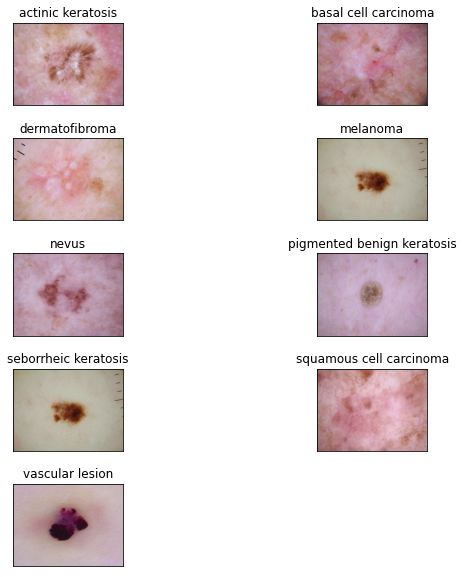

In [82]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.2, hspace=0.4)
i=1
print("### Visualizing one image from each class of Training Data Set ###")
for class_name in class_names:
  cur_class_path = class_name+'/*'; # getting all files from path train data and the current class path.
  class_name_images = list(data_dir_train.glob(cur_class_path)) # Loaded all images of current class.
  ax = fig.add_subplot(5, 2, i, xticks=[], yticks=[]) # visualize pics in format of 5 rows and 2 cols.
  ax.imshow(PIL.Image.open(str(class_name_images[0]))) # Ploting image
  ax.set(title=class_name) # Setting title as the class name
  i = i + 1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [83]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [84]:
### Your code goes here

# Normalizing it with /255 since pixel value is in between 0-255
normalization_layer = layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))

In [85]:
num_classes = len(class_names)
input_shape = (180,180,3)

model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [86]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_27 (ModuleWr  (None, 178, 178, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_28 (ModuleWr  (None, 176, 176, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_29 (ModuleWr  (None, 88, 88, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_30 (ModuleWr  (None, 86, 86, 64)       18496     
 apper)                                               

### Train the model

In [88]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=2,
  shuffle=False
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 - 73s - loss: 1.9873 - accuracy: 0.2757 - val_loss: 1.7039 - val_accuracy: 0.4676 - 73s/epoch - 1s/step
Epoch 2/20
56/56 - 7s - loss: 1.6331 - accuracy: 0.4364 - val_loss: 1.5610 - val_accuracy: 0.4832 - 7s/epoch - 133ms/step
Epoch 3/20
56/56 - 7s - loss: 1.4253 - accuracy: 0.4961 - val_loss: 1.4892 - val_accuracy: 0.5056 - 7s/epoch - 133ms/step
Epoch 4/20
56/56 - 7s - loss: 1.3785 - accuracy: 0.5017 - val_loss: 1.5603 - val_accuracy: 0.4855 - 7s/epoch - 133ms/step
Epoch 5/20
56/56 - 7s - loss: 1.2973 - accuracy: 0.5474 - val_loss: 1.4505 - val_accuracy: 0.5168 - 7s/epoch - 132ms/step
Epoch 6/20
56/56 - 7s - loss: 1.2283 - accuracy: 0.5592 - val_loss: 1.4373 - val_accuracy: 0.5168 - 7s/epoch - 132ms/step
Epoch 7/20
56/56 - 7s - loss: 1.1381 - accuracy: 0.5915 - val_loss: 1.4549 - val_accuracy: 0.5123 - 7s/epoch - 132ms/step
Epoch 8/20
56/56 - 7s - loss: 1.1103 - accuracy: 0.6060 - val_loss: 1.6544 - val_accuracy: 0.4765 - 7s/epoch - 133ms/step
Epoch 9/20
56/56 - 7s - loss: 1.0690

### Visualizing training results

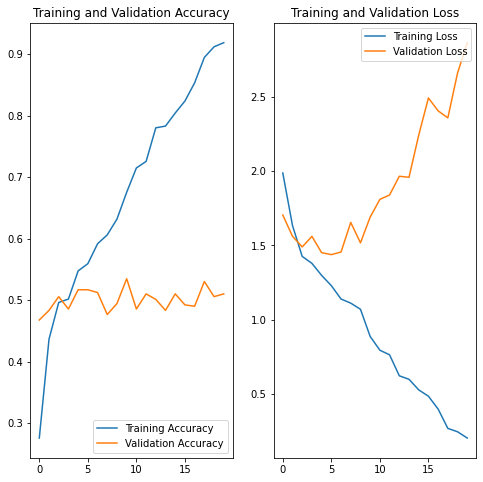

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [90]:
print("### Model Evaluation on Validation Set ###");
val_result = model.evaluate(val_ds)
dict(zip(model.metrics_names, val_result))

print("### Model Evaluation on Test Set ###");
val_result = model.evaluate(test_ds)
dict(zip(model.metrics_names, val_result))

### Model Evaluation on Validation Set ###
14/14 [==============================] - 1s 40ms/step - loss: 2.8655 - accuracy: 0.5101
### Model Evaluation on Test Set ###
4/4 [==============================] - 4s 45ms/step - loss: 6.2374 - accuracy: 0.2797


{'accuracy': 0.27966102957725525, 'loss': 6.237392902374268}

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## I have used optimizer as 'adam' since it produces the best accuracy among the all optimizers for both training and testing. It is also a good optimizer to use for image classification model
## I have used loss function as 'sparse_categorical_crossentropy' since we need the provide the category of the image as one of the class.

# From the above accuracy details we can see that data is overfitted (Bcz, validation accuracy is significantly very less than train accuracy). so,need to provide the best way for get ridinng of the ovefit of the data


### Write your findings here

In [91]:
init_train_ds = train_ds

In [92]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# We are performing augmentation by flipping the images horizontally and rotating the images 0.1 each time around 180 degrees and 
# zooming of picture 0.1 each time upto 100 percent
# hence it creates set of images of same kind in diferent angels and zooming
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        validation_split=0.2,
        vertical_flip=False)  # randomly flip images
  
## Generating training and validation data set from the augmented data with proper validation split of 0.2

train_ds = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = class_names,
    subset='training',
    seed=123,
    batch_size = batch_size
 )

val_ds = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = class_names,
    subset='validation',
    seed=123,
    batch_size = batch_size
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


#### Augumented image of one of the randomly taken image from training data set ####


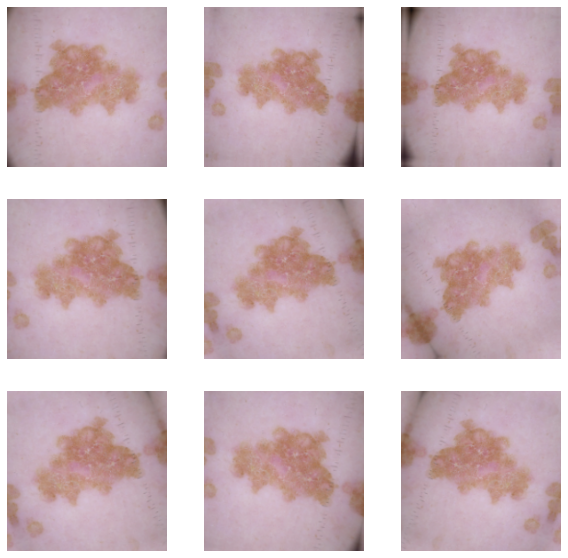

In [136]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
print("#### Augumented image of one of the randomly taken image from training data set ####")
plt.figure(figsize=(10, 10))
for images, labels in init_train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Hence u can seee same image is how it got flipped and rotated in different angels

### Todo:
### Create the model, compile and train the model


In [94]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

# Increse the model size by adding another 32 layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# Max Pool size of 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


### Compiling the model

In [95]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_39 (ModuleWr  (None, 180, 180, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_40 (ModuleWr  (None, 180, 180, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_41 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_42 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                               

### Training the model

In [96]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=2
)

Epoch 1/20
57/57 - 55s - loss: 2.3862 - accuracy: 0.1850 - val_loss: 2.1204 - val_accuracy: 0.2072 - 55s/epoch - 971ms/step
Epoch 2/20
57/57 - 52s - loss: 2.0515 - accuracy: 0.1699 - val_loss: 2.0154 - val_accuracy: 0.2072 - 52s/epoch - 910ms/step
Epoch 3/20
57/57 - 52s - loss: 2.0123 - accuracy: 0.2184 - val_loss: 1.9576 - val_accuracy: 0.3063 - 52s/epoch - 912ms/step
Epoch 4/20
57/57 - 51s - loss: 1.9669 - accuracy: 0.2529 - val_loss: 1.8957 - val_accuracy: 0.3108 - 51s/epoch - 896ms/step
Epoch 5/20
57/57 - 52s - loss: 1.8838 - accuracy: 0.2908 - val_loss: 1.8159 - val_accuracy: 0.3514 - 52s/epoch - 917ms/step
Epoch 6/20
57/57 - 52s - loss: 1.7925 - accuracy: 0.3532 - val_loss: 1.6726 - val_accuracy: 0.3626 - 52s/epoch - 913ms/step
Epoch 7/20
57/57 - 52s - loss: 1.6658 - accuracy: 0.3866 - val_loss: 1.6360 - val_accuracy: 0.3626 - 52s/epoch - 907ms/step
Epoch 8/20
57/57 - 52s - loss: 1.6179 - accuracy: 0.4206 - val_loss: 1.5706 - val_accuracy: 0.3896 - 52s/epoch - 906ms/step
Epoch 9/

### Visualizing the results

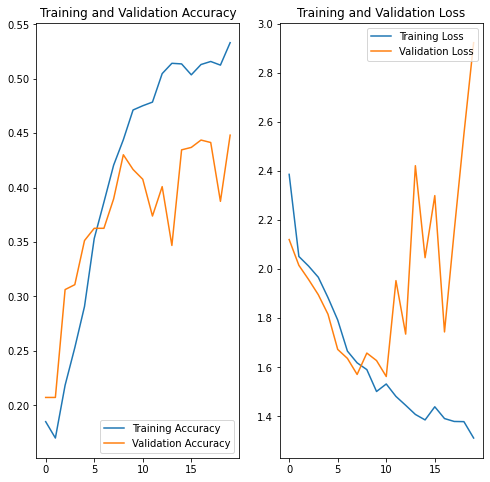

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [99]:
print("### Model Evaluation on Validation Set ###");
val_result = model.evaluate(val_ds)
dict(zip(model.metrics_names, val_result))


### Model Evaluation on Validation Set ###
14/14 [==============================] - 17s 1s/step - loss: 2.7511 - accuracy: 0.4257


{'accuracy': 0.4256756901741028, 'loss': 2.7510769367218018}

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


## On adding dropouts to our existing model, the overfitting problem was reduced significantly compared to earlier model, which we can say it by the accuracy got in training data set.

## From graph we can see that training data set accuracies were increasing as epochs are moving forward, but validation data set accuracy is fluctuating. Due to this we can evident that loss of validation data set is more which means that predictions on validation data set are not so accuracte.

# We are having the ovrerfitting problem with our model because, validation accuracy is far less when comapred with the training accuracy. This might be happend due to the class imbalance in the data set.


## So, We need to make more improvement in the model by rectifying the class imabalnce

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [101]:
## Your code goes here.
print("### Visualizing one image from each class of Training Data Set ###")
counts = []
for class_name in class_names:
  cur_class_path = class_name+'/*';
  total_class_name_images = len(list(data_dir_train.glob(cur_class_path)))
  counts.append(total_class_name_images);
  print(class_name , " : " , total_class_name_images , " : " , round((total_class_name_images/2239)*100, 2))

### Visualizing one image from each class of Training Data Set ###
actinic keratosis  :  114  :  5.09
basal cell carcinoma  :  376  :  16.79
dermatofibroma  :  95  :  4.24
melanoma  :  438  :  19.56
nevus  :  357  :  15.94
pigmented benign keratosis  :  462  :  20.63
seborrheic keratosis  :  77  :  3.44
squamous cell carcinoma  :  181  :  8.08
vascular lesion  :  139  :  6.21


<BarContainer object of 9 artists>

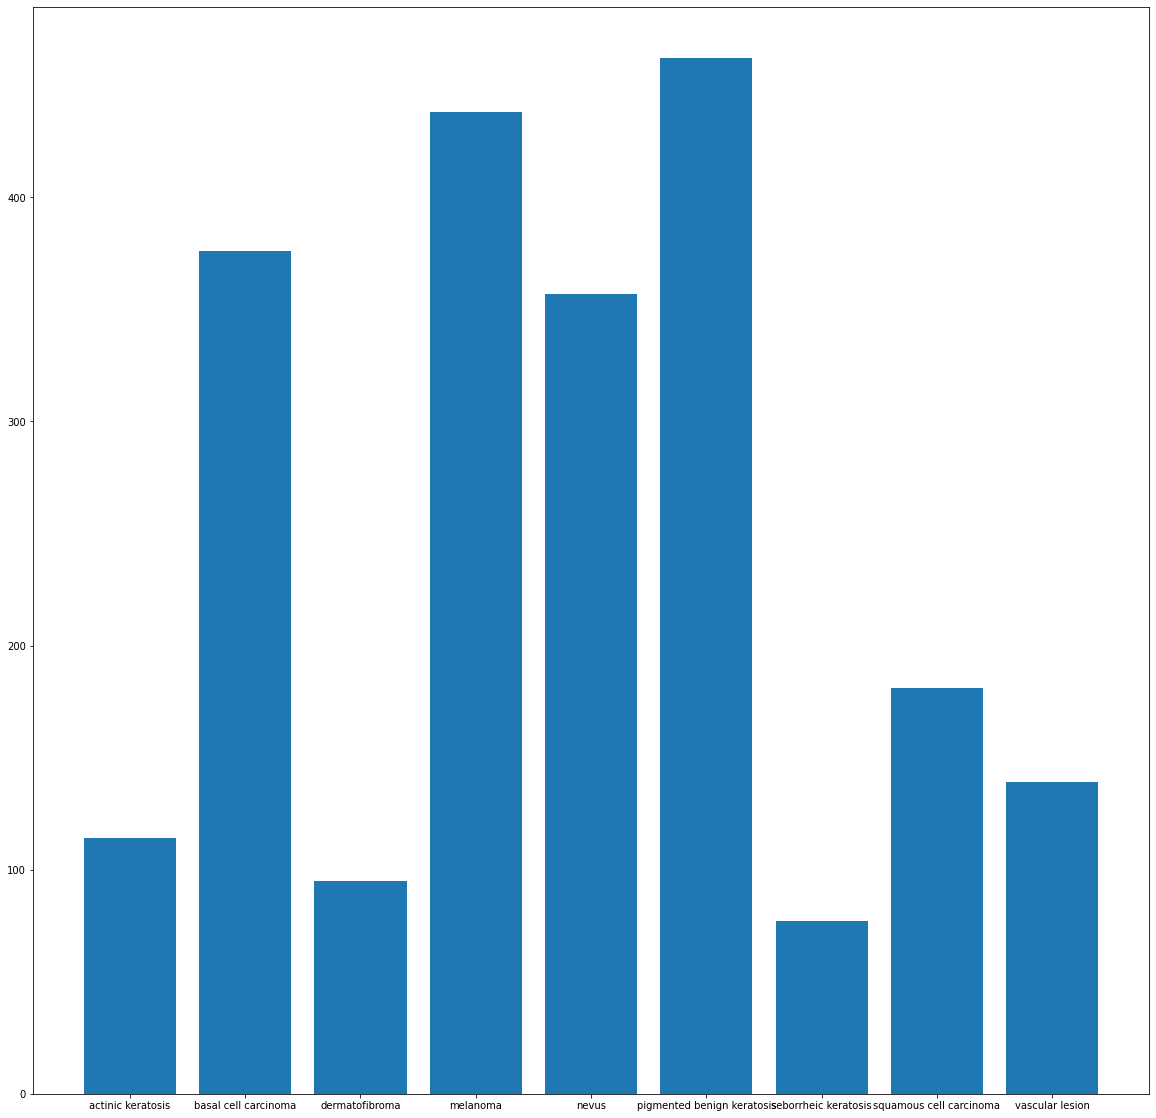

In [102]:
plt.figure(figsize=(20, 20))
plt.bar(class_names, counts)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
# `seborrheic keratosis`
#### - Which classes dominate the data in terms proportionate number of samples?
# `pigmented benign keratosis`


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [103]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [104]:
#### Augmentor helps in creating the data set in such a way that it creates equal quantity of images for all classes so that class imabalnce will gets resolved
### Augmentor data is placed in the output directory of the relative path 

path_to_training_dataset = path_to_train_directory
import Augmentor
for i in class_names:
    print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) ## We are adding 1000 samples per class to make sure that none of the classes are sparse.

/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F400198CBD0>: 100%|██████████| 1000/1000 [00:47<00:00, 21.10 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4001749250>: 100%|██████████| 1000/1000 [00:45<00:00, 22.04 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F400169A1D0>: 100%|██████████| 1000/1000 [00:47<00:00, 21.21 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F407F2B5890>: 100%|██████████| 1000/1000 [03:11<00:00,  5.22 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
Initialised with 357 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F4001D73B90>: 100%|██████████| 1000/1000 [03:01<00:00,  5.50 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4005DAD810>: 100%|██████████| 1000/1000 [00:39<00:00, 25.55 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F40F8E927D0>: 100%|██████████| 1000/1000 [01:33<00:00, 10.71 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F407017BE10>: 100%|██████████| 1000/1000 [00:37<00:00, 26.32 Samples/s]


/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to /Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F40FA5BB9D0>: 100%|██████████| 1000/1000 [00:38<00:00, 25.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [105]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [106]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027760.jpg_8acc4cc1-9508-4d4c-a4d3-c498c156f0a2.jpg',
 '/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025083.jpg_f292257d-6b18-4189-b7fc-22b8ccae4d8a.jpg',
 '/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024761.jpg_afed7dd6-ca55-423c-be52-33832cb05e41.jpg',
 '/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026714.jpg_cfcdc130-08e6-40f3-ad48-3e5185e7d7b9.jpg',
 '/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028389.jpg_38c53a15-5484-4114-b4ce-a0e321953b9a.j

In [107]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [108]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [109]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [110]:
new_df['Label'].value_counts()

nevus                         1000
vascular lesion               1000
dermatofibroma                1000
squamous cell carcinoma       1000
actinic keratosis             1000
pigmented benign keratosis    1000
melanoma                      1000
seborrheic keratosis          1000
basal cell carcinoma          1000
Name: Label, dtype: int64

So, now we have added 1000 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [111]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [113]:
train_ds = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = class_names,
    subset='training',
    seed=123,
    batch_size = batch_size
 )

Found 8995 images belonging to 9 classes.


#### **Todo:** Create a validation dataset

In [114]:
val_ds = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = class_names,
    subset='validation',
    seed=123,
    batch_size = batch_size
)

Found 2244 images belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [122]:
## your code goes here

model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

# Increse the model size by adding another 32 layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# Max Pool size of 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Adding Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [125]:
## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_57 (ModuleWr  (None, 180, 180, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_58 (ModuleWr  (None, 180, 180, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_59 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_60 (ModuleWr  (None, 90, 90, 32)       128       
 apper)                                               

#### **Todo:**  Train your model

In [126]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=2,
  shuffle=False
)

Epoch 1/50
282/282 - 211s - loss: 1.9606 - accuracy: 0.3432 - val_loss: 2.6491 - val_accuracy: 0.1462 - 211s/epoch - 749ms/step
Epoch 2/50
282/282 - 210s - loss: 1.5204 - accuracy: 0.4491 - val_loss: 1.5810 - val_accuracy: 0.4060 - 210s/epoch - 746ms/step
Epoch 3/50
282/282 - 210s - loss: 1.3451 - accuracy: 0.5016 - val_loss: 2.7071 - val_accuracy: 0.3369 - 210s/epoch - 744ms/step
Epoch 4/50
282/282 - 211s - loss: 1.2479 - accuracy: 0.5306 - val_loss: 1.3665 - val_accuracy: 0.4826 - 211s/epoch - 748ms/step
Epoch 5/50
282/282 - 205s - loss: 1.1773 - accuracy: 0.5638 - val_loss: 1.9591 - val_accuracy: 0.3917 - 205s/epoch - 728ms/step
Epoch 6/50
282/282 - 201s - loss: 1.1253 - accuracy: 0.5841 - val_loss: 1.2705 - val_accuracy: 0.5508 - 201s/epoch - 711ms/step
Epoch 7/50
282/282 - 200s - loss: 1.0631 - accuracy: 0.6039 - val_loss: 1.3663 - val_accuracy: 0.4969 - 200s/epoch - 707ms/step
Epoch 8/50
282/282 - 206s - loss: 1.0504 - accuracy: 0.6093 - val_loss: 1.8531 - val_accuracy: 0.4006 - 

#### **Todo:**  Visualize the model results

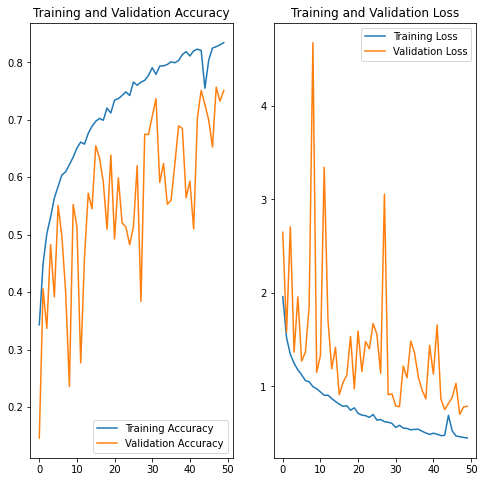

In [127]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [129]:
print("### Model Evaluation on Validation Set ###");
val_result = model.evaluate(val_ds)
dict(zip(model.metrics_names, val_result))

### Model Evaluation on Validation Set ###
71/71 [==============================] - 48s 677ms/step - loss: 0.7870 - accuracy: 0.7491


{'accuracy': 0.7491087317466736, 'loss': 0.7870153784751892}

In [137]:
print("### Model Evaluation on Train Set ###");
val_result = model.evaluate(train_ds)
dict(zip(model.metrics_names, val_result))

### Model Evaluation on Train Set ###
282/282 [==============================] - 149s 527ms/step - loss: 0.2661 - accuracy: 0.9087


{'accuracy': 0.9087270498275757, 'loss': 0.26605385541915894}

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

# Yes class rebalance obsolutely helped in increasing the model performance on both trainign and validation data set.
# We can see there is an significant increase in the model performance and accuracy than the previous model.
# We can also observe that accuracy of the both train and test data sets were increasing as the epoch are increasing. Loss is also decreasing with increasing in number of epochs. This makes sure that predictions are happening well on both train and validation data sets.
# Hence, We can say that we were ovecomed the problem of overfitting with the help of class rebalance.
# We can still improve our model for more accuracy in validation data set 